## Importing Libraries and Data

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

In [36]:
data=pd.read_csv(r"C:\Users\bhavy\Downloads\query.csv")
df=pd.DataFrame(data)

### Understanding the Data

Below Dataset contains the records of Earthquake occured between 11/25/2023 and 12/25/2023. This data is taken from US geological survey website: https://earthquake.usgs.gov/earthquakes/search/

#### Brief discription of all the columns

•	time: Time when the event occurred. Times are reported in milliseconds since the epoch ( 1970-01-01T000000.000Z), and do not           include leap seconds. In certain output formats, the date is formatted for readability. 

•	latitude: Decimal degrees latitude. Negative values for southern latitudes. longitude: Decimal degrees 

•	longitude. Negative values for western longitudes.

•	Depth: Depth of the event in kilometers. The depth where the earthquake begins to rupture. This depth may be relative to the WGS84 geoid, mean sea-level, or the average elevation of the seismic stations which provided arrival-time data for the earthquake location. 

•	mag: The magnitude for the event. Earthquake magnitude is a measure of the size of an earthquake at its source. 

•	magType: The method or algorithm used to calculate the preferred magnitude for the event.

•	nst: The total number of seismic stations used to determine earthquake location. 

•	gap: The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties. 

•	dmin: Horizontal distance from the epicenter to the nearest station (in degrees). 1 degree is approximately 111.2 kilometers. In general, the smaller this number, the more reliable is the calculated depth of the earthquake. 

•	rms: The root-mean-square (RMS) travel time residual, in sec, using all weights. This parameter provides a measure of the fit of the observed arrival times to the predicted arrival times for this location. Smaller numbers reflect a better fit of the data. 

•	net: The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event. 

•	id: A unique identifier for the event. This is the current preferred id for the event, and may change over time.

•	updated: Time when the event was most recently updated. Times are reported in milliseconds since the epoch. 

•	place: Textual description of named geographic region near to the event. This may be a city name, or a Flinn-Engdahl Region name. If there is no nearby city within 300 kilometers (or if the nearby cities database is unavailable for some reason), the Flinn-Engdahl (F-E) seismic and geographical regionalization scheme is used. 

•	type: Type of seismic event. 


•	horizontalError: Uncertainty of reported location of the event in kilometers. 

•	depthError: Uncertainty of reported depth of the event in kilometers. 

•	magError: Uncertainty of reported magnitude of the event. 

•	magNst: The total number of seismic stations used to calculate the magnitude for this earthquake. 

•	status: Indicates whether the event has been reviewed by a human. Status is either automatic or reviewed. Automatic events are directly posted by automatic processing systems and have not been verified or altered by a human. Reviewed events have been looked at by a human. The level of review can range from a quick validity check to a careful reanalysis of the event. 

•	locationSource: The network that originally authored the reported location of this event. 

•	magSource: Network that originally authored the reported magnitude for this event.


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9259 entries, 0 to 9258
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9259 non-null   object 
 1   latitude         9259 non-null   float64
 2   longitude        9259 non-null   float64
 3   depth            9259 non-null   float64
 4   mag              9259 non-null   float64
 5   magType          9259 non-null   object 
 6   nst              7018 non-null   float64
 7   gap              7017 non-null   float64
 8   dmin             6086 non-null   float64
 9   rms              9259 non-null   float64
 10  net              9259 non-null   object 
 11  id               9259 non-null   object 
 12  updated          9259 non-null   object 
 13  place            8910 non-null   object 
 14  type             9259 non-null   object 
 15  horizontalError  6573 non-null   float64
 16  depthError       9259 non-null   float64
 17  magError      

No column has a null value

In [38]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9259.000000,9259.000000,9259.000000,9259.000000,7018.000000,7017.00000,6086.000000,9259.000000,6573.000000,9259.000000,7008.000000,7015.000000
mean,36.749878,-96.722621,28.288910,2.064038,29.173696,107.69649,0.983713,0.336015,2.690344,2.328200,0.227998,21.438632
std,20.675786,88.715024,56.323109,1.295635,25.387635,61.82905,2.702104,0.279753,3.966749,4.650308,0.395157,32.925669
min,-63.570300,-179.942000,-3.410000,0.500000,0.000000,14.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.574500,-150.721300,4.300000,1.130000,13.000000,63.00000,0.018385,0.115050,0.260000,0.430000,0.100000,7.000000
50%,37.563000,-121.675000,9.970000,1.700000,22.000000,91.00000,0.084820,0.220000,0.550000,0.770000,0.154000,13.000000
75%,53.853883,-104.248000,31.310000,2.400000,37.000000,134.00000,0.808000,0.540000,3.830000,1.884000,0.213980,22.000000
max,82.880400,179.922700,633.858000,7.600000,302.000000,349.00000,50.820000,1.890000,28.510000,40.300000,5.180000,563.000000


In [39]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-11-25T00:07:39.135Z,-0.082700,-17.201800,10.000,4.40,mb,14.0,65.0,8.29700,0.30,...,2023-12-04T00:17:00.040Z,NaN,earthquake,9.89,1.888,0.309000,3.0,reviewed,us,us
1,2023-11-25T00:11:02.288Z,64.982700,-147.390100,0.000,1.40,ml,NaN,NaN,NaN,0.31,...,2023-12-08T18:27:54.965Z,"11 km ENE of Fox, Alaska",explosion,NaN,0.000,NaN,NaN,reviewed,ak,ak
2,2023-11-25T00:12:16.775Z,-22.734300,-66.166700,248.031,4.30,mb,65.0,39.0,1.86900,0.43,...,2023-12-04T02:05:38.040Z,"Jujuy, Argentina",earthquake,7.84,7.513,0.126000,18.0,reviewed,us,us
3,2023-11-25T00:14:14.170Z,17.953833,-66.936500,16.380,2.27,md,6.0,205.0,0.05843,0.05,...,2023-11-25T00:32:35.040Z,NaN,earthquake,0.53,0.600,0.077779,4.0,reviewed,pr,pr
4,2023-11-25T00:15:50.020Z,33.513667,-116.753833,4.240,0.59,ml,30.0,66.0,0.03888,0.12,...,2023-11-29T20:12:19.161Z,"9 km WSW of Anza, CA",earthquake,0.18,0.260,0.176000,14.0,reviewed,ci,ci


### Finding and Removing Duplicate Values

In [40]:
print("Total Duplicate values",df.duplicated().sum())

Total Duplicate values 2


In [41]:
if df.duplicated().sum()!=0:
    df=df.drop_duplicates()

In [42]:
print("Total Duplicate values",df.duplicated().sum())

Total Duplicate values 0


### Unique Values

In [43]:
print(df.nunique())

time               9257
latitude           8067
longitude          8324
depth              4232
mag                 427
magType              11
nst                 168
gap                 590
dmin               4467
rms                 430
net                  15
id                 9257
updated            9257
place              5425
type                  5
horizontalError    1720
depthError         2515
magError           1693
magNst              210
status                2
locationSource       15
magSource            16
dtype: int64


### All the Location of Earthquakes

In [44]:
df['place']

0                                   NaN
1              11 km ENE of Fox, Alaska
2                      Jujuy, Argentina
3                                   NaN
4                  9 km WSW of Anza, CA
                     ...               
9254    14 km WSW of Searles Valley, CA
9255         1 km NW of The Geysers, CA
9256       65 km NNE of Van Horn, Texas
9257      118 km SSE of Chenega, Alaska
9258      59 km WNW of Nanwalek, Alaska
Name: place, Length: 9257, dtype: object

##### We need to fetch the names of State/Country for further analysis and to present it in different visualization

### Splitting the 'place' column to get the State/Country of the Earthquake

In [45]:
df['country']=df['place'].str.rsplit(",").str[-1]

In [46]:
df['country'].nunique()

158

In [47]:
df['Area']=df['country']

In [48]:
df=df.drop('country',axis=1)

### Number of Earthquake in different State/Country

In [49]:
print('Number of Earthquake in different regions')
df['Area'].value_counts()

Number of Earthquake in different regions


Area
 Alaska                          2631
 CA                              2457
 Hawaii                           594
 Philippines                      529
 Texas                            369
                                 ... 
South Indian Ocean                  1
Chile-Argentina border region       1
Gulf of Aden                        1
 Micronesia                         1
 Russia region                      1
Name: count, Length: 158, dtype: int64

Alaska, California and Hawaii were the top states where majority of the Earthquake occured in US

### Arranging the Data for Rows in Columns

In [50]:
Key=df['Area'].value_counts()[:10].sort_values(ascending=False).index.tolist()
Values=df['Area'].value_counts()[:10].sort_values(ascending=False).tolist()

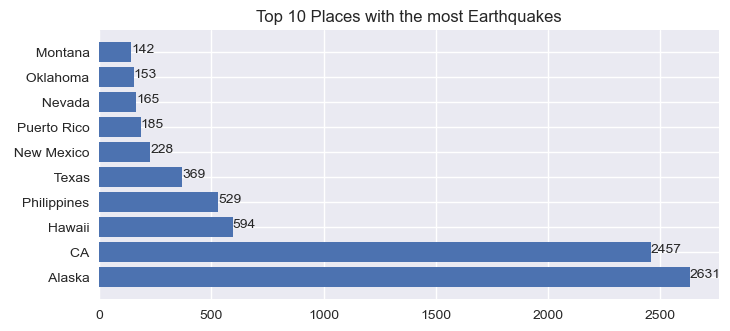

In [51]:
plt.figure().set_figheight(3.5)
plt.barh(Key,Values)
plt.title('Top 10 Places with the most Earthquakes')
plt.style.use('seaborn-v0_8')   
for index,value in enumerate(Values):
    plt.text(value,index,str(value))

Majority of the Earthquakes occured in the USA's states of Alaska, California, Hawaii. Philippines also lies on the coast of pacific ocean and on the Ring of Fire.

### Places with Earthquake greater than 4 Magnitude

As we filter the earthquake on the basis of magnitude and search the Earthquake that are above magnitude, it can be seen that number decreases. It can be concluded that majority of the earthquakes were below the magnitude of 4 and doesn't even felt or rarely cause damage.

In [52]:
great4=df.query('mag>=4')
great4['Area'].value_counts()

Area
 Philippines                     529
 Indonesia                        92
 Northern Mariana Islands         69
Reykjanes Ridge                   62
 Papua New Guinea                 47
                                ... 
Dominican Republic region          1
Myanmar                            1
South Indian Ocean                 1
Chile-Argentina border region      1
 Washington                        1
Name: count, Length: 107, dtype: int64

In [53]:
Key=great4['Area'].value_counts()[:15].sort_values(ascending=False).index.tolist()
Values=great4['Area'].value_counts()[:15].sort_values(ascending=False).tolist()

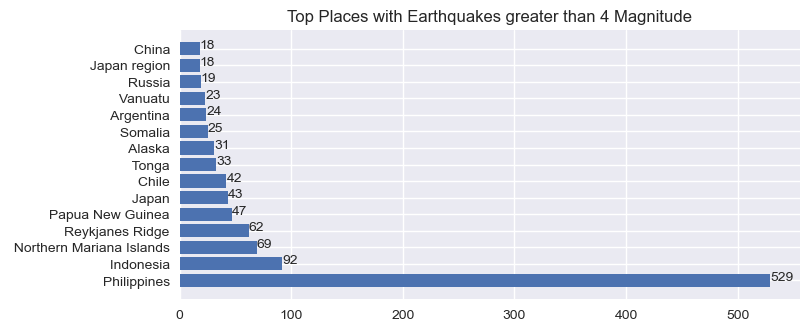

In [54]:
plt.figure().set_figheight(3.5)
plt.barh(Key,Values)
plt.title('Top Places with Earthquakes greater than 4 Magnitude')
plt.style.use('seaborn-v0_8')   
for index,value in enumerate(Values):
    plt.text(value,index,str(value))


Majority of the earthqauke happened near or in Philippines which also lies on 'Ring of Fire'.

## Plotting on the Longitude and Latitude


In [55]:
x=df['latitude']
y=df['longitude']

Text(0.5, 1.0, 'Earthquakes by Latitude and Longitude')

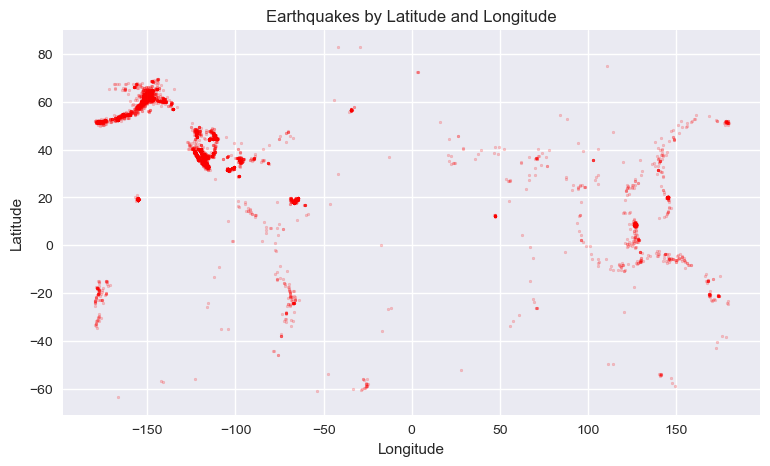

In [56]:
fig=plt.subplots(figsize=(9, 5))
plt.scatter(y,x,s=4,alpha=0.2,c='red')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Earthquakes by Latitude and Longitude')

Above scatter plot shows the earthquake occured on the earth, lighter the dot, lesser the magnitude and darker the dot, greater the magnitude.

## Lets plot it on the World Map

In [57]:
df_geo=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.longitude,df.latitude))

In [58]:
world_data=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\bhavy\AppData\Local\Temp\ipykernel_13636\4114218330.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'Earthquakes over the world')

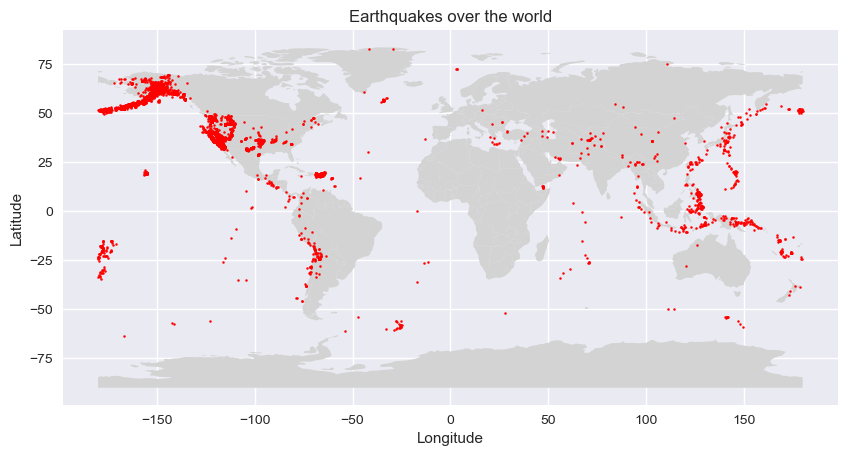

In [59]:
fig,ax=plt.subplots(figsize=(10, 12))
world_data.plot(color="lightgrey",ax=ax)
plt.scatter(y,x,s=2,c='red')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Earthquakes over the world')

Majority of the earthquake occured around 'Ring of Fire'. The Ring of Fire is a tectonic belt of volcanoes and earthquakes, about 40,000 km long and up to about 500 km wide, which surrounds most of the Pacific Ocean.

### Plotting the Frequency vs Magnitude Graph

In [60]:
df['magnitude']=df['mag'].round(1)
df['magnitude']

0       4.4
1       1.4
2       4.3
3       2.3
4       0.6
       ... 
9254    0.8
9255    0.8
9256    1.6
9257    3.6
9258    1.8
Name: magnitude, Length: 9257, dtype: float64

In [61]:
Key=df['magnitude'].value_counts().sort_values(ascending=False).index.tolist()
Key
Values=df['magnitude'].value_counts().sort_values(ascending=False).tolist()
print(df['magnitude'])

0       4.4
1       1.4
2       4.3
3       2.3
4       0.6
       ... 
9254    0.8
9255    0.8
9256    1.6
9257    3.6
9258    1.8
Name: magnitude, Length: 9257, dtype: float64


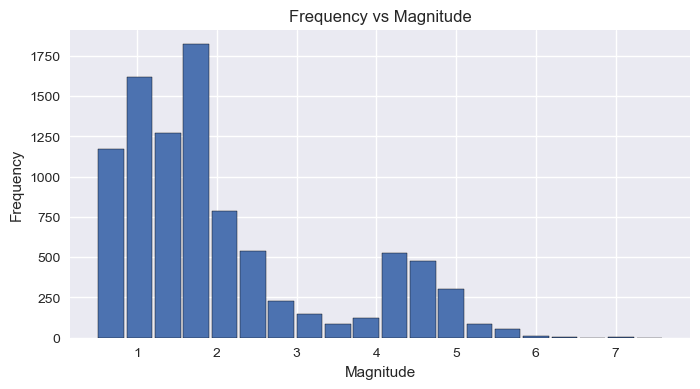

<Figure size 300x350 with 0 Axes>

In [62]:
plt.figure().set_figheight(4)
plt.hist(df['magnitude'],bins=20,edgecolor='Black',rwidth=.9)
plt.title('Frequency vs Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.figure(figsize=(3, 3.5))
plt.style.use('seaborn-v0_8')


From the above graph it can be concluded that majority of the Earthquake was of the magnitude less 3 and wasn't even felt while the Earthqake greater than magnitude 3 is less in number.